<center>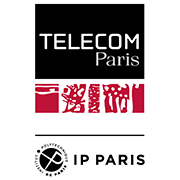</center>

<h1><center><strong><font color="green">IA 717: CHAI & justice: linguistics of AI ethics charters & manifestos</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> <a>Maria Boritchev</a></h3>
<email>maria.boritchev@telecom-paris.fr</email>
<br/>

Year 2025-2026
</center>

------------------------

# <font color="green">**Context and objectives**</font>

> The recent years have seen a surge of initiatives with the goal of defining what “ethical” artificial intelligence would or should entail, resulting in the publication of various charters and manifestos discussing AI ethics; these documents originate from academia, AI industry companies, non-profits, regulatory institutions, and the civil society. The contents of such documents vary wildly, from short, vague position statements to verbatims of democratic debates or impact assessment studies. As such, they are a marker of the social world of artificial intelligence, outlining the tenets of different actors, the consensus and dissensus on important goals, and so on. <a href="https://mapaie.telecom-paris.fr/mapaie-paper.pdf">Mapping AI Ethics: a meso-scale analysis of its charters and manifestos, M. Gornet et al, 2024.</a>

The objective of this project to study the linguistic specificities of a corpus of charters and manifestos of AI ethics, called ```MapAIE```. We will study the semantic structure of sentences from MapAIE using the Abstract Meaning Representation (<a href="https://github.com/amrisi/amr-guidelines/blob/master/amr.md">AMR</a>) abstraction method. In particular, we will focus on the usage and the environment of the term _justice_, in order to see its context and the (possibly different?) meanings associated with its usage.

This project is organised in three subtasks:
1) Data retrieval and exploration.
2) Exploration of the term _justice_ in the data.
3) AMR graphs exploration & exploration of the term _justice_ in AMR graphs.


### <font color="green">Evaluation</font>

The project is evaluated through a presentation with a report and your completed project, documented with a README. Grades will be partly individual and partly collective. 

# <font color="green">**1 - Data Presentation and Retrieval**</font>

Our main corpus is called _MapAIE - Mapping AI Ethics_. It is a collection of 436 common charters and manifestos around artificial intelligence and AI ethics. The corpus' <a href="https://mapaie.telecom-paris.fr/mapaie-datasheet.pdf">datasheet</a> provides detailed information about the collection process and the contents of the corpus. 

<font color="red">1.1 Question:</font> Using the git repository https://gitlab.telecom-paris.fr/tiphaine.viard/mapaie, build the data locally. How many documents are there in the ```./pdf``` folder? in the ```./txt``` folder?

In [1]:
import os
import csv

doc_folder = "data/docs"
text_folder = "data/txts"

files = [f for f in os.listdir(doc_folder) if os.path.isfile(os.path.join(doc_folder, f))]
text_files = [f for f in os.listdir(text_folder) if os.path.isfile(os.path.join(text_folder, f))]

pdf_html_documents = [os.path.splitext(file)[0] for file in files]
text_documents = [os.path.splitext(file)[0] for file in text_files]


should_be_included = []
is_included = False


with open('data/all_manifestos.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        is_included = any(cell.lower() == "included" for cell in row)
        if is_included:
            #print(i-1)
            #print(row)
            should_be_included.append(str(i-1))
                


num_pdf = len(pdf_html_documents)
num_txt = len(text_documents)
num_included = len(should_be_included)

print(f"Nombre de fichiers PDF : {num_pdf}")
print(f"Nombre de fichiers TXT : {num_txt}")
print(f"Nombre total de fichiers devant être inclus : {num_included}")

missing_in_text = set(should_be_included) - set(text_documents)
missing_in_pdf_html = set(should_be_included) - set(pdf_html_documents)

print(f"Nombre de fichiers manquants dans TXT : {len(missing_in_text)}")
print(f"Nombre de fichiers manquants dans PDF/HTML : {len(missing_in_pdf_html)}")

if missing_in_text:
    print(f"Exemples fichiers manquants dans TXT : {list(missing_in_text)[:20]}")

if missing_in_pdf_html:
    print(f"Exemples fichiers manquants dans PDF/HTML : {list(missing_in_pdf_html)[:20]}")

Nombre de fichiers PDF : 801
Nombre de fichiers TXT : 650
Nombre total de fichiers devant être inclus : 437
Nombre de fichiers manquants dans TXT : 43
Nombre de fichiers manquants dans PDF/HTML : 43
Exemples fichiers manquants dans TXT : ['464', '495', '455', '610', '519', '260', '555', '451', '389', '662', '115', '481', '506', '383', '652', '661', '453', '536', '487', '648']
Exemples fichiers manquants dans PDF/HTML : ['464', '495', '455', '610', '519', '260', '555', '451', '389', '662', '115', '481', '506', '383', '652', '661', '453', '536', '487', '648']


<font color="yellow">1.1 Answer:</font>

If the answer in the previous question is different from 436, reduce the local data by keeping only the documents that should be included in the corpus. These documents are identified in the file `all_manifestos.csv`, these are the documents which state `Included`in the column `Status`. 

Let's explore the data. As you can see, documents in ```./pdf``` folder and documents in the ```./txt``` folder are the same, and the name formatting is such that ```n.txt``` contains plain text extracted from ```n.pdf```.

<font color="red">1.2 Question:</font> Why is it useful to have the data both in .pdf and .txt format? Cite one advantage and one drawback for linguistic analysis for each of the formats.

<font color="orange">1.2 Answer:</font> 

Having the data in PDF format preserves the original layout but is harder to analyze automatically, while TXT files are easy to process with language tools but lose the original formatting.

We now want to know more about words and key-words used throughout the corpus. There are several terms that are widely used when writing about ethics of AI, and it is interesting from a linguistic point of view to see where and how these words occur.

<font color="red">1.3 Question:</font> what are the most frequent words, excluding stopwords, in the whole corpus? Please provide visualizations and comment these visualisations.

In [3]:
import pdfplumber
from bs4 import BeautifulSoup

def extract_text(file_path):
    text = ""
    
    if file_path.lower().endswith('.pdf'):
        try:
            with pdfplumber.open('data/docs/' + file_path) as pdf:
                for page in pdf.pages:
                    page_text = page.extract_text()
                    if page_text:
                        text += page_text + " "
        except Exception as e:
            print(f"Warning: Could not read PDF {file_path}: {e}")

    elif file_path.lower().endswith('.html'):        
            encodings_to_try = ['utf-8', 'windows-1252', 'iso-8859-1']
            success = False
            for enc in encodings_to_try:
                try:
                    with open('data/docs/' + file_path, 'r', encoding=enc) as f:
                        soup = BeautifulSoup(f, 'html.parser')
                        text += soup.get_text(separator=' ') + " "
                    success = True
                    break
                except UnicodeDecodeError:
                    continue

            # Try auto-detection if all known encodings fail
            if not success:
                with open('data/docs' + file_path, 'rb') as f:
                    raw = f.read()
                    detected = chardet.detect(raw)
                    encoding = detected.get('encoding', 'utf-8')
                    try:
                        text += BeautifulSoup(raw.decode(encoding, errors='ignore'), 'html.parser').get_text(separator=' ')
                    except Exception as e:
                        print(f"⚠️ Could not decode {file_path} even after detection: {e}")


    elif file_path.lower().endswith('.txt'):
        try:
            with open('data/txts/' + file_path, 'r', encoding='utf-8') as f:
                text += f.read() + " "
        except Exception as e:
            print(f"Warning: Could not read TXT {file_path}: {e}")

    else:
        print(f"Skipping unsupported file type: {file_path}")
    return text

In [ ]:
import os
import string
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk



nltk.download('punkt')
nltk.download('stopwords')

# ----- mixed file list -----
file_list = files + text_files

# ----- Step 1: Extract text -----


# Combine text from all files
all_text = ""
for file_path in file_list:
    all_text += extract_text(file_path)

# ----- Step 2: Preprocess text -----
# Lowercase
all_text = all_text.lower()
# Remove punctuation
all_text = all_text.translate(str.maketrans('', '', string.punctuation))
# Tokenize
words = word_tokenize(all_text)
# Remove stopwords
stop_words = set(stopwords.words('english') + stopwords.words('french') + ['null', 'obj', 'endobj'])
filtered_words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 1]

# ----- Step 3: Count word frequencies -----
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

# ----- Step 4: Visualizations -----
# Bar chart
words_bar, counts_bar = zip(*top_words)
plt.figure(figsize=(12,6))
plt.bar(words_bar, counts_bar, color='skyblue')
plt.title("Top 20 Most Frequent Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/durantoine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/durantoine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P11' is an invalid float value
Cannot set gray non-stroke color because /'P59' is an invalid float value
Cannot set gray non-stroke color because /'P61' is an invalid float value
Cannot set gray non-stroke color because /'P62' is an invalid float value
Cannot set gray non-stroke color because /'P64' is an invalid float value
Cannot set gray non-stroke color because /'P65' is an invalid float value
Cannot set gray non-stroke color because /'P66' is an invalid float value
Cannot set gray non-stroke color because /'P67' is an invalid float value
Cannot set gray non-stroke color because /'P68' is an invalid float value
Cannot set gray non-stroke color because /'P69' is an invalid float value
Cannot set gray non-stroke 

Skipping unsupported file type: .DS_Store


Cannot set gray non-stroke color because /'P217' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P225' is an invalid float value
Cannot set gray non-stroke color because /'P229' is an invalid float value
Cannot set gray non-stroke color because /'P233' is an invalid float value
Cannot set gray non-stroke color because /'P237' is an invalid float value
Cannot set gray non-stroke color because /'P380' is an invalid float value
Cannot set gray non-stroke color because /'P685' is an invalid float value
Cannot set gray non-stroke color because /'P691' is an invalid float value
Cannot set gray non-stroke color because /'P697' is an invalid float value
Cannot set gray non-stroke color because /'P703' is an invalid float value
Cannot set gray non-stroke color because /'P709' is an invalid float value
Cannot set gray non-stroke color because /'P715' is an invalid float value
Cannot set gray non-strok

Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke color because /'P3' is an invalid float value
Cannot set gray non-stroke color because /'P4' is an invalid float value
Cannot set gray non-stroke color because /'P5' is an invalid float value
Cannot set gray non-stroke color because /'P6' is an invalid float value
Cannot set gray non-stroke color because /'P7' is an invalid float value
Cannot set gray non-stroke color because /'P8' is an invalid float value
Cannot set gray non-stroke color because /'P9' is an invalid float value
Cannot set gray non-stroke color because /'P298' is an invalid float value
Cannot set gray non-stroke color because /'P301' is an invalid float value
Cannot set gray non-stroke color because /'P312' is an invalid float value
Cannot set gray non-stroke color because /'P3

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1082552b0>>
Traceback (most recent call last):
  File "/Users/durantoine/Dev/MSIA/NLP/chai-justice/.venv/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


<font color="orange">1.3 Answer:</font> 

# <font color="green">**2 - Exploration of the term _justice_ in the data**</font>


<font color="red">2.1 Question:</font> Draw a visualisation of the amount of times the term _justice_ is used in a document compared with the total amount of words in a document. Comment this viualisation: what can we observe? What hypothesis can we draw from this observation?

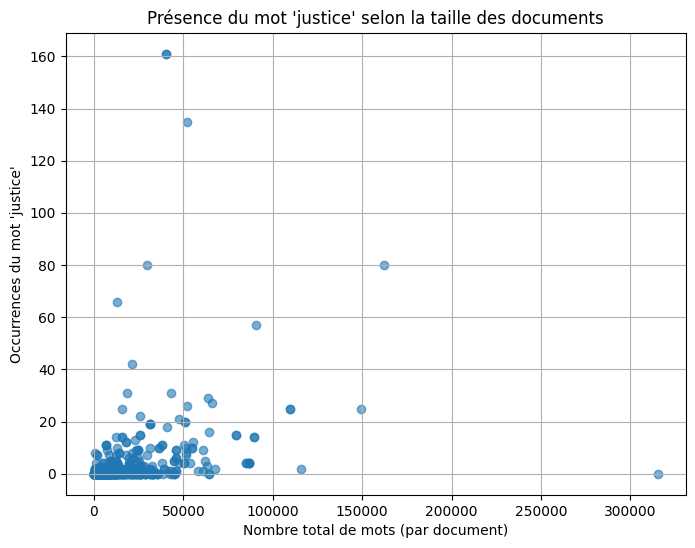

In [ ]:
# To-do
import os
import pandas as pd
import matplotlib.pyplot as plt

TXTS_DIR = "./data/txts"

data = []
for f in os.listdir(TXTS_DIR):
    if f.lower().endswith(".txt"):
        path = os.path.join(TXTS_DIR, f)
        with open(path, "r", encoding="utf-8", errors="ignore") as file:
            text = file.read().lower().split()
            total_words = len(text)
            justice_count = text.count("justice")
            data.append((f, justice_count, total_words, justice_count/total_words if total_words else 0))

df = pd.DataFrame(data, columns=["document", "justice_count", "total_words", "ratio"])

# Visualisation scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["total_words"], df["justice_count"], alpha=0.6)
plt.xlabel("Nombre total de mots (par document)")
plt.ylabel("Occurrences du mot 'justice'")
plt.title("Présence du mot 'justice' selon la taille des documents")
plt.grid(True)
plt.show()

<font color="orange">2.1 Answer:</font> 

La grande majorité des points est très proches de l’axe horizontal (en dessous de 50 occurences) cela signifie que la plupart des documents contiennent très peu (voire zéro) occurrences de "justice", même quand leur taille est conséquente.

On observe la présence de quelques valeurs extrêmes (outliers) représentant des documents (points isolés en haut du graphe) qui contiennent beaucoup plus d’occurrences (jusqu’à plus de 200).

On ne voit pas de relation proportionnelle entre la taille du document et la fréquence absolue de justice. Parfois, des documents longs ne contiennent presque pas le terme, et inversement des documents relativement courts l’utilisent plusieurs dizaines de fois.

<font color="red">2.2 Question:</font> which are the documents in which the term _justice_ appears the most (top 10% of the corpus)? Please provide a visualization and comment it.

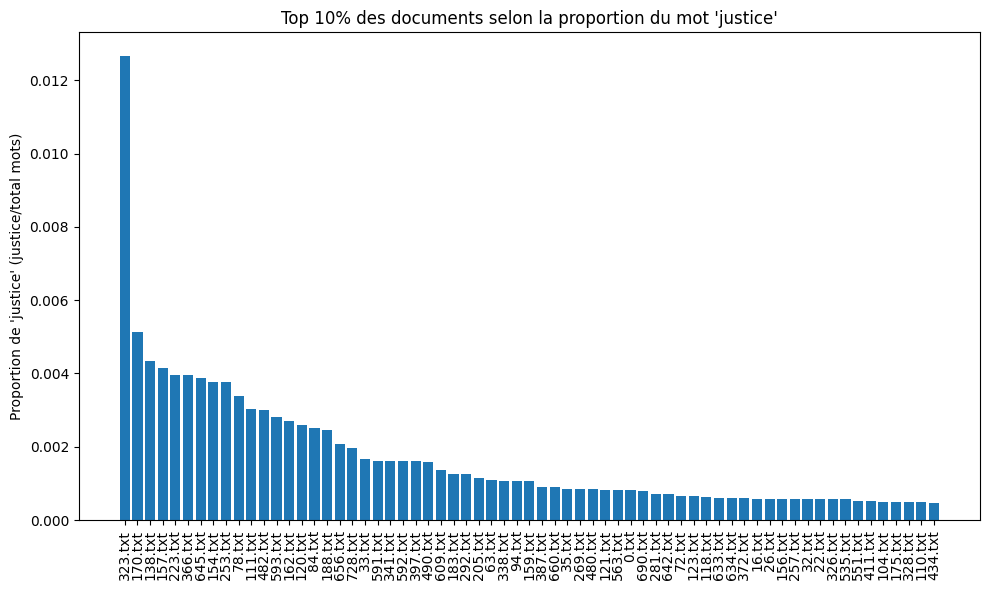

,document,justice_count,total_words,ratio
496,323.txt,8,631,0.012678
227,170.txt,66,12854,0.005135
120,138.txt,2,462,0.004329
315,157.txt,2,482,0.004149
332,223.txt,161,40533,0.003972
...,...,...,...,...
117,104.txt,1,1994,0.000502
190,175.txt,1,1994,0.000502
48,328.txt,26,51894,0.000501
119,110.txt,80,162278,0.000493


In [ ]:
# To-do
import os
import pandas as pd
import matplotlib.pyplot as plt

TXTS_DIR = "./data/txts"

data = []
for f in os.listdir(TXTS_DIR): #os.listdir(path) sert à lister le contenu d’un dossier
    if f.lower().endswith(".txt"): #vérifie que le fichier se termine bien par .txt
        path = os.path.join(TXTS_DIR, f) #os.path.join(path1, path2) sert à joindre deux chemins de dossiers
        with open(path, "r", encoding="utf-8", errors="ignore") as file: 
            text = file.read().lower().split()
            total_words = len(text)
            justice_count = text.count("justice")
            ratio = justice_count/total_words if total_words else 0
            data.append((f, justice_count, total_words, ratio))

df = pd.DataFrame(data, columns=["document", "justice_count", "total_words", "ratio"])

# Trier par ratio décroissant
df_sorted = df.sort_values("ratio", ascending=False)

# Calculer le top 10%
top_10pct = int(len(df_sorted) * 0.1)
df_top = df_sorted.head(top_10pct)

# Visualisation
plt.figure(figsize=(10,6))
plt.bar(df_top["document"], df_top["ratio"])
plt.xticks(rotation=90)
plt.ylabel("Proportion de 'justice' (justice/total mots)")
plt.title("Top 10% des documents selon la proportion du mot 'justice'")
plt.tight_layout()
plt.show()

n = max(1, int(len(df_sorted) * 0.1))  # évite d'avoir 0 si corpus < 10
df_top = df_sorted.head(n)

df_top


323.txt : seulement 8 occurrences, mais sur un texte très court (631 mots), donc le ratio est le plus élevé (environ 1,27%).

170.txt & 171.txt : 66 occurrences chacun sur à peu près 12 852 mots --> ratio plus faible (environ 0,5%).

138.txt et 157.txt : très petits textes (462 et 482 mots), avec seulement 2 occurrences --> cela leur donne un ratio relativement élevé (environ 0,4%).

366.txt : beaucoup plus long (40 533 mots), 161 occurrences --> en valeur absolue c’est un des plus “chargés” en justice, mais son ratio est plus bas (environ 0,39%).

168.txt : énorme document (76 329 mots), 267 occurrences --> gros volume absolu, mais ratio plus faible (environ 0,35%).

<font color="orange">2.2 Answer:</font> 

Now, we want to know more about the context in which the term _justice_ appears in the corpus. 

<font color="red">2.3 Question:</font> Explore the context in which the term _justice_ appears in the documents selected in the previous question (top 10% of the corpus). Please provide a visualisation and comment it.

Hint: you could for example consider n-grams containing _justice_ (but feel free to explore context by other means!)

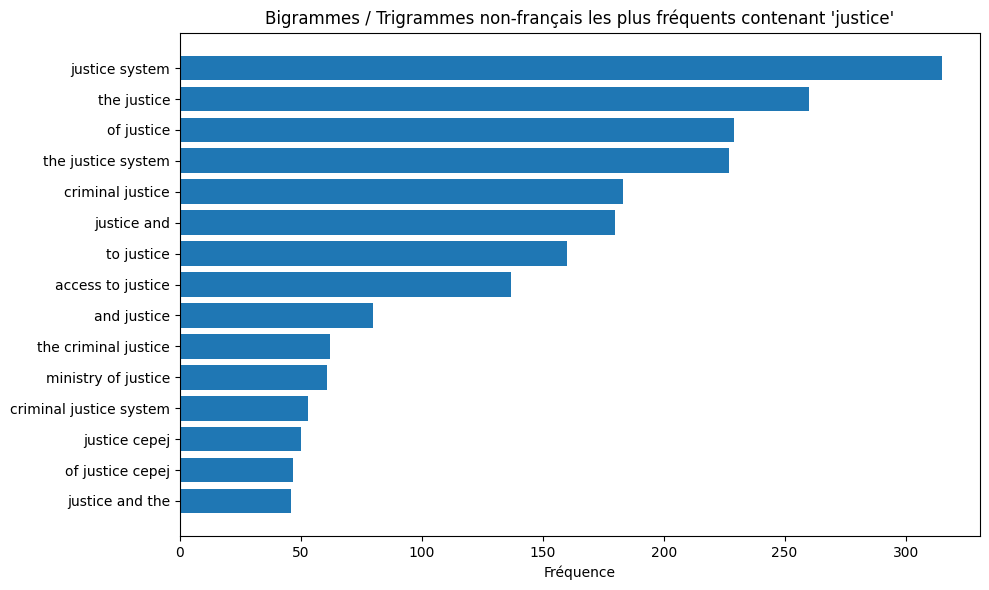

In [ ]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory

# Pour rendre la détection reproductible
DetectorFactory.seed = 0

TXTS_DIR = "./data/txts"

def extract_ngrams(words, n=2):
    """Construit tous les n-grammes d'une liste de mots"""
    return [" ".join(words[i:i+n]) for i in range(len(words)-n+1)]

FRENCH_STOPWORDS = {
    'la', 'le', 'les', 'de', 'des', 'du', 'un', 'une',
    'et', 'ou', 'dans', 'pour', 'par', 'sur', 'avec',
    'cette', 'ces', 'son', 'sa', 'ses', 'leur', 'leurs',
    'au', 'aux', 'en', 'ne', 'pas', 'plus', 'tout', 'tous'
}


def is_not_french(text):
    """Retourne True si le texte n'est PAS en français"""
    
    if any(word in FRENCH_STOPWORDS for word in text.split()):
        return False
    
    try:
        return detect(text) != "fr"
    except:
        # Si la détection échoue (trop court, caractères spéciaux, etc.)
        return False

ngrams_counter = Counter()

# Parcourir les fichiers du top 10%
for fname in df_top["document"]:
    path = os.path.join(TXTS_DIR, fname)
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read().lower()
        words = re.findall(r"\w+", text)

        # bigrammes et trigrammes
        bigrams = extract_ngrams(words, 2)
        trigrams = extract_ngrams(words, 3)

        # garder uniquement ceux qui contiennent "justice"
        for bg in bigrams:
            if "justice" in bg and is_not_french(bg):
                ngrams_counter[bg] += 1
     
        for tg in trigrams:
            if "justice" in tg and is_not_french(tg) and tg != "n the justice":
                ngrams_counter[tg] += 1

# Sélection des 15 n-grams les plus fréquents
top_ngrams = ngrams_counter.most_common(15)

# Visualisation en bar chart
labels, values = zip(*top_ngrams)
plt.figure(figsize=(10,6))
plt.barh(labels, values)
plt.title("Bigrammes / Trigrammes non-français les plus fréquents contenant 'justice'")
plt.xlabel("Fréquence")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


La première observation concerne la forte présence de déterminants dans les occurences qui n'apporte pas d'éléments de contexte pertinents pour l'analyse. Nous allons donc refaire cette analyse en les excluant grâce à l'ajout d'un filtre contains_stopword() qui élimine les n-grammes dominés par des déterminants, prépositions ou conjonctions.

On observe également la présence de quelques éléments francophones : la justice, de la justice. Cela indique que l'efficacité du filtrage linguistique n'est pas totale bien que globalement efficace. Ces expressions peuvent provenir de documents bilingues, de citations en français dans des textes anglais,
ou d’erreurs de détection.

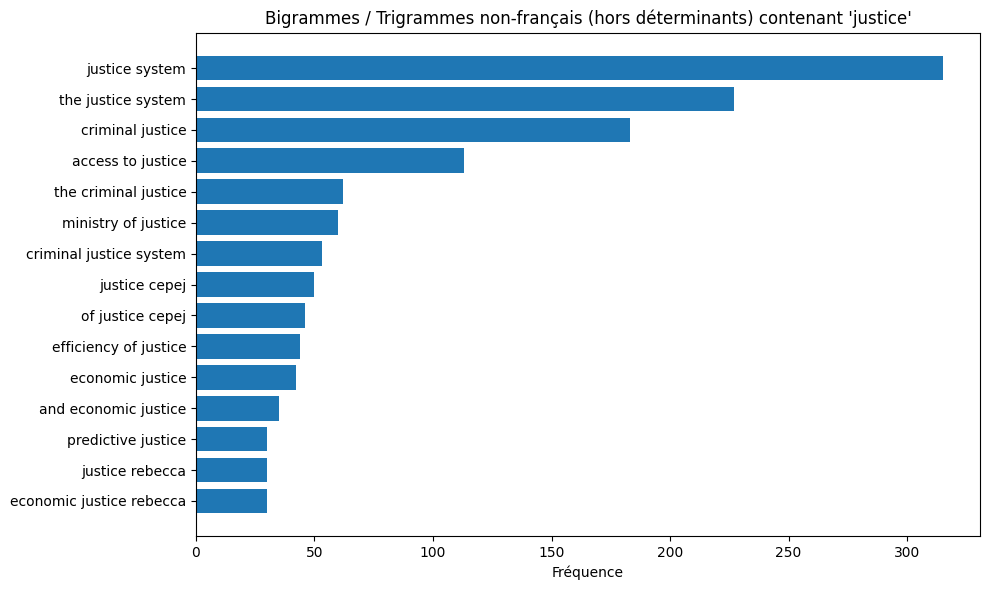

In [ ]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory

# Pour rendre la détection reproductible
DetectorFactory.seed = 0

TXTS_DIR = "./data/txts"



# ⚙️ Liste de mots vides à exclure (anglais + français)
STOPWORDS = {
    "the", "a", "an", "of", "to", "in", "and", "for", "on", "at", "by", "with", "from", "is", "as", "that", "this", "these", "those", "of the"
}

def contains_stopword(ngram):
    """Renvoie True si l’n-gramme contient uniquement ou majoritairement des mots outils"""
    words = ngram.split()
    # On exclut les n-grammes où la moitié (ou plus) des mots sont des stopwords
    stop_count = sum(w in STOPWORDS for w in words)
    return stop_count >= len(words) / 2

ngrams_counter = Counter()

# Parcourir les fichiers du top 10%
for fname in df_top["document"]:
    path = os.path.join(TXTS_DIR, fname)
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read().lower()
        words = re.findall(r"\w+", text)

        bigrams = extract_ngrams(words, 2)
        trigrams = extract_ngrams(words, 3)

        # garder uniquement ceux qui contiennent "justice"
        for bg in bigrams:
            if "justice" in bg and is_not_french(bg) and not contains_stopword(bg):
                ngrams_counter[bg] += 1
     
        for tg in trigrams:
            if "justice" in tg and is_not_french(tg) and tg != "n the justice" and not contains_stopword(bg):
                ngrams_counter[tg] += 1

# Sélection des 15 n-grams les plus fréquents
top_ngrams = ngrams_counter.most_common(15)

# Visualisation
labels, values = zip(*top_ngrams)
plt.figure(figsize=(10,6))
plt.barh(labels, values)
plt.title("Bigrammes / Trigrammes non-français (hors déterminants) contenant 'justice'")
plt.xlabel("Fréquence")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Cette seconde analyse nous permet d'identifier beaucoup plus finement des axes d'analyse pertinents au travers de l'identifications de thématiques dominantes

1. Axe institutionnel et structurel : justice system, the justice system, criminal justice system, the criminal justice.
Cet axe renvoie à la structure organisationnelle du système judiciaire, son fonctionnement, ses acteurs et ses processus. C’est la thématique la plus dominante : la justice est abordée comme un système institutionnel, un appareil d’État à évaluer, réformer ou comparer.

2. Axe pénal et criminologique : criminal justice, criminal justice system, the criminal justice
Ici, la justice est traitée sous l’angle répressif et sécuritaire : gestion du crime, prévention, réinsertion, réforme pénale, etc. 

3. Axe de l’accès et de l’équité : access to justice, efficiency of justice
Ces termes traduisent une réflexion sur l’accessibilité et la performance du système judiciaire, un enjeu crucial pour les institutions internationales (ONU, Conseil de l’Europe, Banque mondiale). Le discours se situe sur le plan de la justice équitable et inclusive.

4. Axe économique et gestionnaire: economic justice, and economic justice, ministry of justice, justice cepej, efficiency of justice
Cet axe lie la justice à des enjeux économiques, budgétaires et managériaux. La mention de CEPEJ (Commission européenne pour l’efficacité de la justice) est révélatrice : il s’agit d’un acteur institutionnel européen centré sur la performance et la rationalisation des systèmes judiciaires.

5. Acteurs institutionnels : ministry of justice justice rebecca, economic justice rebecca 
Ces occurrences suggèrent un discours centré sur les institutions (ministères, commissions, programmes) et parfois sur des personnalités ou études spécifiques (Rebecca semblant être un auteur cité dans le corpus).

Afin d'approfondir cette analyse, nous pouvons relancer une recherche par occurence segmentée sur la base de ces 4 thématiques identifiées. Nous allons pour cela construire un mini dictionnaire de 5 mots correspondant à chaque axe.

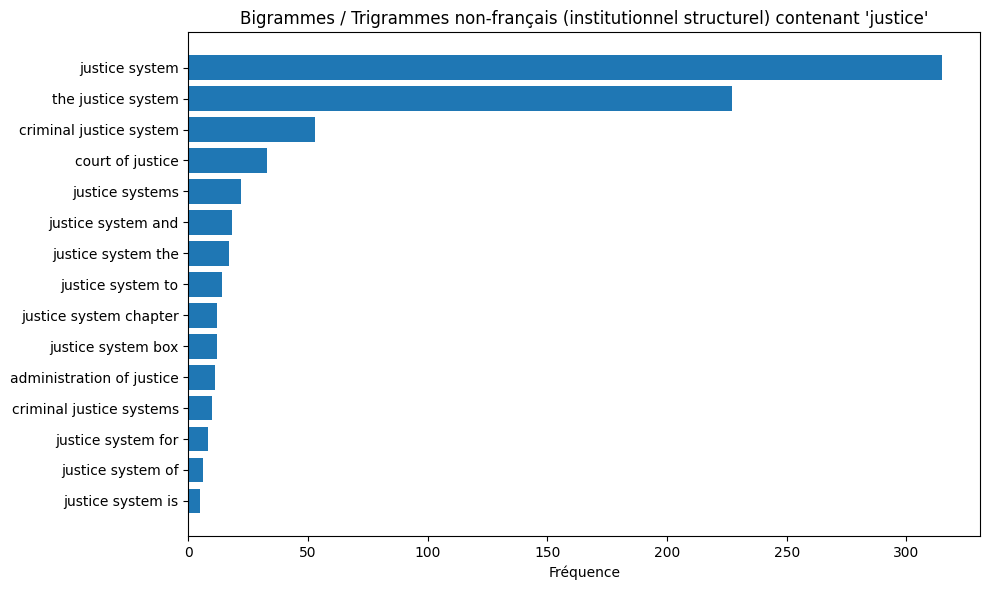

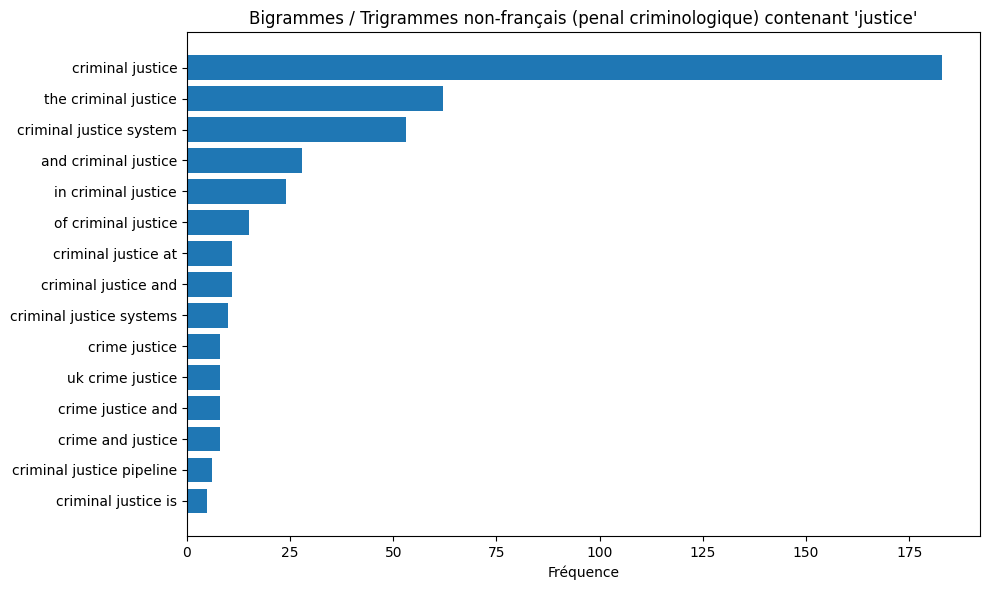

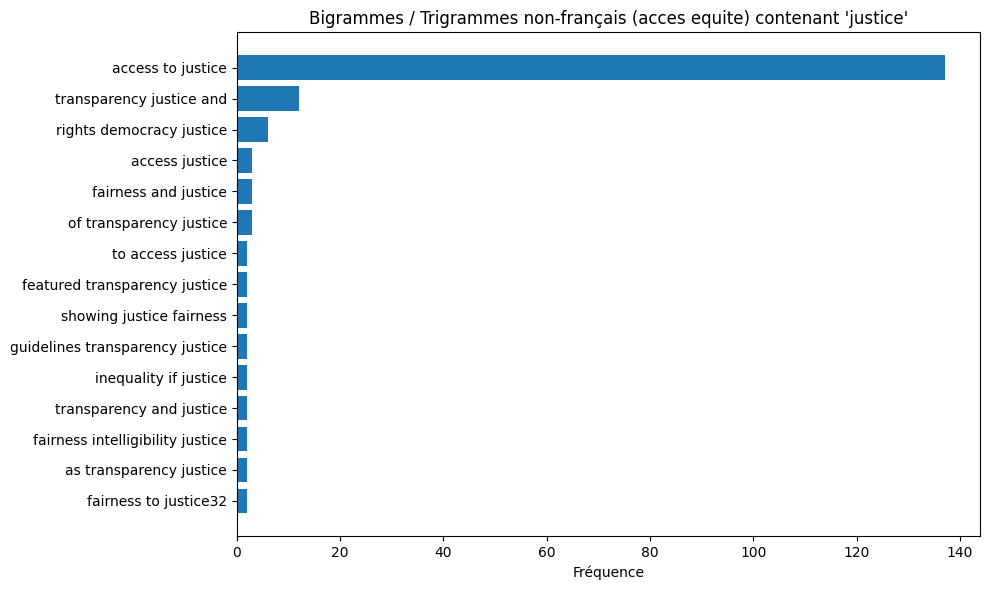

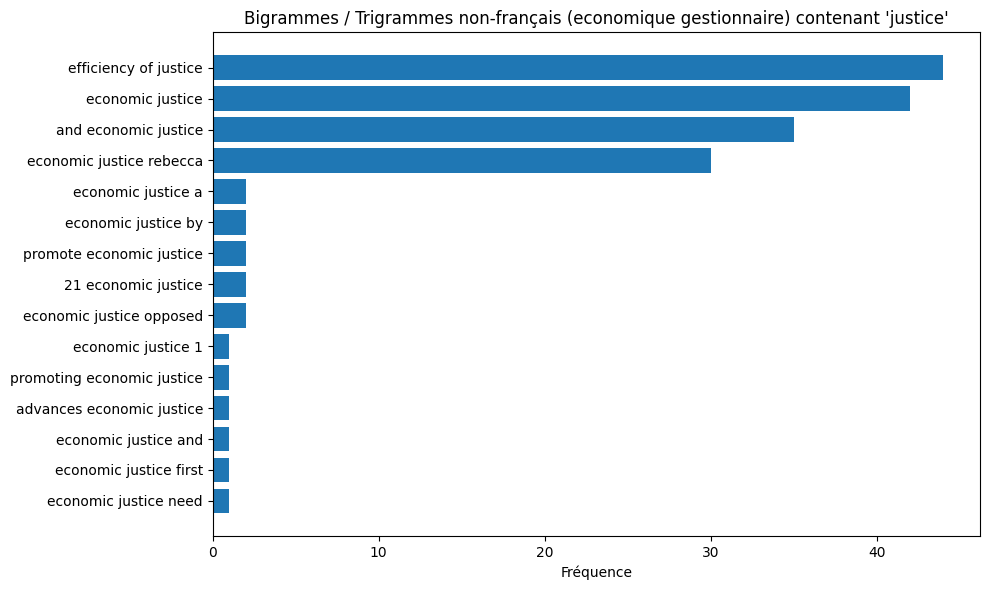

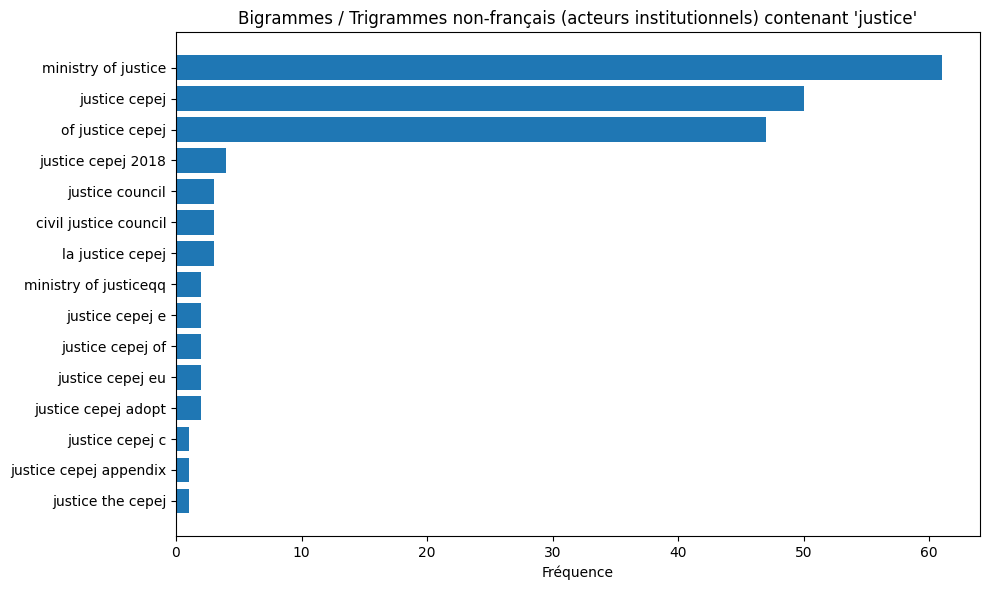

In [ ]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory

# Pour des résultats reproductibles
DetectorFactory.seed = 0

TXTS_DIR = "./data/txts"

def extract_ngrams(words, n=2):
    """Construit tous les n-grammes d'une liste de mots"""
    return [" ".join(words[i:i+n]) for i in range(len(words)-n+1)]

def is_not_french(text):
    """Retourne True si le texte n'est PAS en français"""
    try:
        return detect(text) != "fr"
    except:
        return False


# Dictionnaire des thématiques
THEMES = {
    "institutionnel_structurel": [
        "system", "court", "tribunal", "procedure", "administration", "reform", "organization"
    ],
    "penal_criminologique": [
        "criminal", "crime", "penal", "offender", "prison", "justice reform", "law enforcement"
    ],
    "acces_equite": [
        "access", "fairness", "equality", "rights", "inclusion", "transparency"
    ],
    "economique_gestionnaire": [
        "economic", "efficiency", "performance", "budget", "financing", "cost"
    ],
    "acteurs_institutionnels": [
        "ministry", "cepej", "commission", "council", "united nations", "government"
    ]
}

# Analyse et tri par thématique
theme_counters = {theme: Counter() for theme in THEMES.keys()}

for fname in df_top["document"]:
    path = os.path.join(TXTS_DIR, fname)
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read().lower()
        words = re.findall(r"\w+", text)

        bigrams = extract_ngrams(words, 2)
        trigrams = extract_ngrams(words, 3)

        for ngram_list in [bigrams, trigrams]:
            for ng in ngram_list:
                if "justice" not in ng:
                    continue
                if not is_not_french(ng) or contains_stopword(ng):
                    continue

                # assignation à une thématique
                for theme, keywords in THEMES.items():
                    if any(kw in ng for kw in keywords):
                        theme_counters[theme][ng] += 1

# Visualisation
def plot_theme(theme_name, counter):
    if not counter:
        print(f"Aucune donnée pour le thème '{theme_name}'.")
        return
    top_ngrams = counter.most_common(15)
    labels, values = zip(*top_ngrams)
    plt.figure(figsize=(10,6))
    plt.barh(labels, values)
    plt.title(f"Bigrammes / Trigrammes non-français ({theme_name.replace('_',' ')}) contenant 'justice'")
    plt.xlabel("Fréquence")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

for theme_name, counter in theme_counters.items():
    plot_theme(theme_name, counter)


<font color="orange">2.3 Answer:</font> 

We will now focus on a sentence-level analysis of our corpus and extract a sub-corpus of sentences that use the word _justice_.

In [ ]:
from pathlib import Path
import re
import random
from collections import Counter, defaultdict
import pandas as pd

TXTS_DIR = Path("./data/txts") 
KEYWORD = "justice"                    
OUT_CSV  = "justice-MapAIE_sentences.csv"

# Regex de split de phrases
SENT_SPLIT_RE = re.compile(r'(?<=[.!?])\s+(?=[A-Z0-9“"(\[])')
KW_RE = re.compile(rf"\b{re.escape(KEYWORD)}\b", flags=re.IGNORECASE)

# Stopwords légers EN+FR
STOP = {
    "the","a","an","of","to","in","and","for","on","at","by","with","from","is","as","that",
    "this","these","those","it","its","be","are","was","were","or","if","but","than","then",
    "la","le","les","de","du","des","au","aux","un","une","et","en","dans","sur","par","pour",
    "ce","cet","cette","ces","est","sont","été","être","ou","si"
}

def doc_id_from_name(fname: str) -> str:
    return Path(fname).stem

def split_sentences(text: str):
    text = re.sub(r"\s+", " ", text.strip())
    if not text:
        return []
    sents = SENT_SPLIT_RE.split(text)
    if len(sents) <= 1:
        sents = re.split(r"[.!?]+", text)
    return [s.strip() for s in sents if s.strip()]

def tokenize(s: str):
    return re.findall(r"[A-Za-zÀ-ÖØ-öø-ÿ0-9']+", s.lower())

def kwic(sentence: str, keyword="justice", width=45) -> str:
    i = sentence.lower().find(keyword.lower())
    if i < 0:
        return sentence
    start = max(0, i - width)
    end = min(len(sentence), i + len(keyword) + width)
    left = sentence[start:i].rjust(width)
    mid = sentence[i:i+len(keyword)]
    right = sentence[i+len(keyword):end].ljust(width)
    return f"{left} [{mid}] {right}"

def top(counter: Counter, k=15) -> pd.DataFrame:
    return pd.DataFrame(counter.most_common(k), columns=["token_or_bigram", "freq"])

def pretty(df, title=None, max_rows=15):
    """Affiche joliment un DataFrame avec bordures et titre."""
    if title:
        print(f"\n{title}")
    return (df.head(max_rows)
              .style.set_table_styles(
                  [{
                      "selector": "th", 
                      "props": [("background-color", "#f2f2f2"),
                                ("font-weight", "bold"),
                                ("text-align", "center"),
                                ("border", "1px solid #999")]
                   },
                   {"selector": "td", 
                    "props": [("border", "1px solid #ccc"),
                              ("padding", "6px")]}])
              .set_properties(**{"text-align": "left"}))

# Extraction des phrases contenant le mot-clé
if not TXTS_DIR.exists():
    raise FileNotFoundError(f"Le dossier {TXTS_DIR.resolve()} est introuvable.")

rows = []
for path in sorted(TXTS_DIR.glob("*.txt")):
    try:
        text = path.read_text(encoding="utf-8", errors="ignore")
    except Exception as e:
        print(f"Impossible de lire {path.name}: {e}")
        continue

    doc_id = doc_id_from_name(path.name)
    for sent in split_sentences(text):
        if KW_RE.search(sent):
            rows.append({"doc_id": doc_id, "sentence": sent})

justice_df = pd.DataFrame(rows, columns=["doc_id", "sentence"]).drop_duplicates().reset_index(drop=True)

# Résumés
total_sentences = len(justice_df)
total_docs = justice_df["doc_id"].nunique()
print(f"Phrases contenant '{KEYWORD}': {total_sentences} (provenant de {total_docs} documents)")

# Table : nb de phrases par document
per_doc = (justice_df.groupby("doc_id", as_index=False)["sentence"]
           .count()
           .rename(columns={"sentence": "n_sentences_with_keyword"})
           .sort_values("n_sentences_with_keyword", ascending=False))

display(pretty(per_doc, title="Top documents par nombre de phrases contenant le mot-clé"))

# Observation qualitative
if total_sentences > 0:
    random.seed(42)
    sample_n = min(10, total_sentences)
    sample_rows = justice_df.sample(sample_n)
    print("\n--- Exemples KWIC (Key Word In Context) ---")
    for s in sample_rows["sentence"].tolist():
        print("•", kwic(s, KEYWORD, width=45))

win = 3
left_ct = Counter()
right_ct = Counter()
bi_ct = Counter()

for sent in justice_df["sentence"]:
    toks = tokenize(sent)
    idxs = [i for i, t in enumerate(toks) if t == KEYWORD.lower()]
    for i in idxs:
        L = toks[max(0, i - win):i]
        R = toks[i + 1:i + 1 + win]
        for w in L:
            if w not in STOP:
                left_ct[w] += 1
                bi_ct[(w, KEYWORD.lower())] += 1
        for w in R:
            if w not in STOP:
                right_ct[w] += 1
                bi_ct[(KEYWORD.lower(), w)] += 1

display(pretty(top(left_ct, 15), title="Voisins à gauche (±3 mots, sans stopwords)"))
display(pretty(top(right_ct, 15), title="Voisins à droite (±3 mots, sans stopwords)"))
display(pretty(top(bi_ct, 20), title="Bigrams typiques avec le mot-clé"))

# Exemples par motif simple
patterns = {
    "X justice": re.compile(r"\b([A-Za-zÀ-ÖØ-öø-ÿ0-9']+)\s+justice\b", re.IGNORECASE),
    "justice X": re.compile(r"\bjustice\s+([A-Za-zÀ-ÖØ-öø-ÿ0-9']+)\b", re.IGNORECASE),
}
examples = defaultdict(list)
for s in justice_df["sentence"]:
    for name, pat in patterns.items():
        m = pat.search(s)
        if m and len(examples[name]) < 5:
            examples[name].append(s)

print("\n--- Exemples par motif ---")
for name, lst in examples.items():
    print(f"\n[{name}]")
    for s in lst:
        print("•", kwic(s, KEYWORD, width=45))


Phrases contenant 'justice': 2460 (provenant de 269 documents)

Top documents par nombre de phrases contenant le mot-clé


,doc_id,n_sentences_with_keyword
13,120,152
66,223,135
141,366,135
6,110,95
36,162,90
10,118,71
39,170,65
251,728,49
86,261,39
99,281,38



--- Exemples KWIC (Key Word In Context) ---
•              Comment les acteur.rice.s de la  [justice]  perçoivent-ils l’avènement de cette technolo
• ting Citizenship and living in the UK Crime,  [justice]  and the law Disabled people Driving and tran
• of inference and correlation in the criminal  [justice]  system, and suggested that its use in the US
• OPINION OF THE COMMITTEE ON CIVIL LIBERTIES,  [JUSTICE]  AND HOME AFFAIRS ...........................
•  democracy, the rule of law and distributive  [justice]  , or on the human mind itself .) Adopt adequ
• e utmost precaution , notably in the area of  [justice]  and law enforcement; 68.                    
• ally discriminatory practices, from criminal  [justice]  to education to employment, and presents ris
•  democracy, the rule of law and distributive  [justice] , or on the human mind itself.) Adopt adequat
• sioner, I aim to promote economic and social  [justice]  through consumer protection and competition 
• ield of civil, co

,token_or_bigram,freq
0,criminal,399
1,n,180
2,i,178
3,access,170
4,court,134
5,social,94
6,ministry,93
7,efficiency,61
8,fairness,60
9,crime,56



Voisins à droite (±3 mots, sans stopwords)


,token_or_bigram,freq
0,system,411
1,european,74
2,fairness,68
3,law,67
4,cepej,59
5,home,47
6,systems,45
7,affairs,45
8,data,40
9,right,34



Bigrams typiques avec le mot-clé


,token_or_bigram,freq
0,"('justice', 'system')",411
1,"('criminal', 'justice')",399
2,"('n', 'justice')",180
3,"('i', 'justice')",178
4,"('access', 'justice')",170
5,"('court', 'justice')",134
6,"('social', 'justice')",94
7,"('ministry', 'justice')",93
8,"('justice', 'european')",74
9,"('justice', 'fairness')",68



--- Exemples par motif ---

[X justice]
•  beneficence, non-maleficence, autonomy, and  [justice] .                                            
•  beneficence, non-maleficence, autonomy, and  [justice]  (Beauchamp & Childress, 2012).              
• n autonomy are addressed in the principle of  [justice] .                                            
•                           The importance of ‘ [justice] ’ is explicitly cited in the Montreal Declara
•                   Under its principle named “ [Justice] , equity and solidarity,” the EGE argues that

[justice X]
•                           The importance of ‘ [justice] ’ is explicitly cited in the Montreal Declara
•                   Under its principle named “ [Justice] , equity and solidarity,” the EGE argues that
•                    The diverse ways in which  [justice]  is characterised hints at a broader lack of 
• atory algorithms are already deployed in the  [justice]  system, wherein judges use these tools for s
• uarte an

Analyse quantitative
Nous relevons 2419 phrases contenant justice issues de 237 documents : le concept de justice est central au sein du dossier MapAIE.
Néammoins, la répartition est hétérogène : certains documents sont extrêmement riches en occurrence (jusqu’à 296 phrases dans un seul document), tandis que d’autres n’en contiennent qu’une ou deux.
Nous pouvons en déduire que très probablement, certains documents dispose d'une vocation juridique ou institutionnelle au sein d'un corpus plus diversifié. 
</br>
</br>
Mots et cooccurences observées
- Mots dominants au sein des cooccurences gauches : criminal, décisions, access, court, social, ministry, economic, predictive, efficiency.
Ces termes permettent d'identifier trois grands registres discursifs :

Institutionnel et structurel : court, ministry, efficiency, cepej, european
--> correspond au discours administratif ou organisationnel sur le système judiciaire.

Pénal et répressif : criminal, crime, law enforcement
--> typique de la criminal justice.

Socio-éthique : social, economic, fairness, decisions
--> traduit un questionnement sur l’équité, la performance et la justice sociale.
Ces associations confirme que le mot justice s’intègre souvent dans des expressions institutionnelles ou politiques : justice system, European justice, Ministry of Justice, access to justice.

La proximité avec fairness suggère aussi un glissement vers des enjeux éthiques et moraux.
Parmis les tops associations, nous relevons
(criminal, justice) --> 314 fois
(justice, system) --> 290 fois
(access, justice) --> 150 fois
(social, justice) --> 86 fois
(ministry, justice) --> 64 fois
(justice, fairness) --> 56 fois
(predictive, justice) --> 55 fois
(justice, cepej) --> 58 fois

Ces collocations révèlent les principaux sous-discours autour de la justice :

Institutionnelle / structurelle : justice system, ministry of justice, justice cepej, efficiency of justice	--> Approche managériale et organisationnelle
</br>
Pénale / répressive	: criminal justice, court justice, law justice	
--> Approche juridique classique
</br>
Sociale / morale : social justice, fairness justice	
--> Approche normative, éthique, philosophique
</br>
Technologique / contemporaine : predictive justice, data justice
--> Approche numérique et innovation judiciaire

Accès et équité	access to justice : droit à l’accès
--> Inclusion et performance des systèmes

Interprétation thématique
À partir des cooccurrences identifiées, nous pouvons dégager 5 grands axes sémantiques :

Axe	Indicateurs lexicaux	Description
1. Institutionnel et structurel : system, ministry, efficiency, cepej, european
--> La justice est vue comme un système administratif à réformer ou moderniser
</br>
2. Pénal et criminologique : criminal, crime, law, court
--> La justice comme instrument de régulation et de sanction
</br>
3. Éthique et sociale : social, fairness, equity
--> La justice comme valeur morale ou principe sociétal

4. Économique et gestionnaire : economic, efficiency, decisions
--> La justice comme processus rationnel et mesurable

5. Technologique et algorithmique : predictive, data, digital, AI
--> La justice dans le contexte de l’innovation et de l’IA

Ces axes confirment que le corpus aborde la justice sous des angles multiples et complémentaires. Néammoins, une forte connotation institutionnelle est à noter.

</br>
Analyse qualitative

Comme évoqué, nous notons la présence de contextes très diversifiés : 
"criminal justice applications" --> justice comme domaine d’application des technologies.
"la justice prédictive" --> dimension technologique et prospective (en français).
"economic justice opposed the plan" --> registre sociopolitique / militant.
"Minister of Justice has declared" --> registre institutionnel et administratif.
"principle of justice, equity and solidarity" --> registre philosophique / éthique.

Il existe un croisement entre ces trois registres : 
- juridique : criminal, law, court
- politique-institutionnel : ministry, cepej, european
- socio-éthique : fairness, equity, solidarity

</br>
Pour conclure:
Le corpus étudié présente un discours : très institutionnel (ministry, system, cepej) et  fortement ancré dans la réforme et la performance (efficiency, predictive, data), avec des résonances éthiques (fairness, social justice).

Il reflète une vision moderne et technicisée de la justice, où cohabitent trois dimensions : le pouvoir public (gouvernance des systèmes judiciaires), la technologisation de la justice (justice prédictive, data justice), la quête de légitimité éthique et sociale (fairness, access, equity).

<font color="red">2.4 Question:</font> What information will we lose by focusing on extracted sentences? Please provide three answers.

<font color="orange">2.4 Answer:</font> 

We will definitely loose information, but focusing on a sentence-level analysis gives us access to finer-grained means of linguistic analysis. 

<font color="red">2.5 Question:</font> Extract the _justice-MapAIE_ corpus: a corpus of sentences of MapAIE containing the term _justice_. Organise the data in such a way that, for each sentence, we have:
- the textual content of the sentence;
- the identifier (number) of the document this sentence is extracted from.
How many sentences does the _justice-MapAIE_ corpus contain?

In [4]:
import re 

file_list = files + text_files

phrases_justice = []

for file in file_list:
    current_text = extract_text(file)
    sentences = re.split(r'(?<=[.!?])\s+', current_text)
    justice_sentences = [s for s in sentences if re.search(r'\bjustice\b', s, re.IGNORECASE) or re.search(r'\bJustice\b', s, re.IGNORECASE)]

    for sent in justice_sentences:
        sent_with_doc_id = sent + ' (extracted from' + str(file) + ')'
        phrases_justice.append(sent_with_doc_id)
        
with open("justice_sentences.txt", "w", encoding="utf-8") as f:
    for phrase in phrases_justice:
        cleaned = re.sub(r'\s+', ' ', phrase)  # remplace tout espace/blanc par un simple espace
        cleaned = cleaned.replace("\u2011", "-").strip()
        f.write(cleaned + "\n")
        
with open("sentences_3.csv", "w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["document_id", "sentence"])
    for file in file_list:
        current_text = extract_text(file)
        sentences = re.split(r'(?<=[.!?])\s+', current_text)
        for s in sentences:
            if re.search(r'\bjustice\b', s, re.IGNORECASE) or re.search(r'\bJustice\b', s, re.IGNORECASE):
                writer.writerow([file.split('.')[0], s.strip()])

Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P11' is an invalid float value
Cannot set gray non-stroke color because /'P59' is an invalid float value
Cannot set gray non-stroke color because /'P61' is an invalid float value
Cannot set gray non-stroke color because /'P62' is an invalid float value
Cannot set gray non-stroke color because /'P64' is an invalid float value
Cannot set gray non-stroke color because /'P65' is an invalid float value
Cannot set gray non-stroke color because /'P66' is an invalid float value
Cannot set gray non-stroke color because /'P67' is an invalid float value
Cannot set gray non-stroke color because /'P68' is an invalid float value
Cannot set gray non-stroke color because /'P69' is an invalid float value
Cannot set gray non-stroke 

Skipping unsupported file type: .DS_Store


Cannot set gray non-stroke color because /'P217' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P225' is an invalid float value
Cannot set gray non-stroke color because /'P229' is an invalid float value
Cannot set gray non-stroke color because /'P233' is an invalid float value
Cannot set gray non-stroke color because /'P237' is an invalid float value
Cannot set gray non-stroke color because /'P380' is an invalid float value
Cannot set gray non-stroke color because /'P685' is an invalid float value
Cannot set gray non-stroke color because /'P691' is an invalid float value
Cannot set gray non-stroke color because /'P697' is an invalid float value
Cannot set gray non-stroke color because /'P703' is an invalid float value
Cannot set gray non-stroke color because /'P709' is an invalid float value
Cannot set gray non-stroke color because /'P715' is an invalid float value
Cannot set gray non-strok

Cannot set gray non-stroke color because /'P298' is an invalid float value
Cannot set gray non-stroke color because /'P301' is an invalid float value
Cannot set gray non-stroke color because /'P312' is an invalid float value
Cannot set gray non-stroke color because /'P323' is an invalid float value


Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value


Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P239' is an invalid float value
Cannot set gray non-stroke color because /'P249' is an invalid float value
Cannot set gray non-stroke color because /'P259' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke 

Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P11' is an invalid float value
Cannot set gray non-stroke color because /'P59' is an invalid float value
Cannot set gray non-stroke color because /'P61' is an invalid float value
Cannot set gray non-stroke color because /'P62' is an invalid float value
Cannot set gray non-stroke color because /'P64' is an invalid float value
Cannot set gray non-stroke color because /'P65' is an invalid float value
Cannot set gray non-stroke color because /'P66' is an invalid float value
Cannot set gray non-stroke color because /'P67' is an invalid float value
Cannot set gray non-stroke color because /'P68' is an invalid float value
Cannot set gray non-stroke color because /'P69' is an invalid float value
Cannot set gray non-stroke 

Skipping unsupported file type: .DS_Store


Cannot set gray non-stroke color because /'P217' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P225' is an invalid float value
Cannot set gray non-stroke color because /'P229' is an invalid float value
Cannot set gray non-stroke color because /'P233' is an invalid float value
Cannot set gray non-stroke color because /'P237' is an invalid float value
Cannot set gray non-stroke color because /'P380' is an invalid float value
Cannot set gray non-stroke color because /'P685' is an invalid float value
Cannot set gray non-stroke color because /'P691' is an invalid float value
Cannot set gray non-stroke color because /'P697' is an invalid float value
Cannot set gray non-stroke color because /'P703' is an invalid float value
Cannot set gray non-stroke color because /'P709' is an invalid float value
Cannot set gray non-stroke color because /'P715' is an invalid float value
Cannot set gray non-strok

Cannot set gray non-stroke color because /'P298' is an invalid float value
Cannot set gray non-stroke color because /'P301' is an invalid float value
Cannot set gray non-stroke color because /'P312' is an invalid float value
Cannot set gray non-stroke color because /'P323' is an invalid float value


Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P226' is an invalid float value
Cannot set gray non-stroke color because /'P228' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value


Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value
Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray stroke color because /'P1' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value


Cannot set gray stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P221' is an invalid float value
Cannot set gray non-stroke color because /'P231' is an invalid float value
Cannot set gray non-stroke color because /'P239' is an invalid float value
Cannot set gray non-stroke color because /'P249' is an invalid float value
Cannot set gray non-stroke color because /'P259' is an invalid float value
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Could get FontBBox from font descriptor because None cannot be parsed as 4 floats
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P0' is an invalid float value
Cannot set gray non-stroke color because /'P1' is an invalid float value
Cannot set gray non-stroke color because /'P2' is an invalid float value
Cannot set gray non-stroke 

Commentaire à ajouter

<font color="orange">2.5 Answer:</font> 

## <font color="red">/!\ To do to get data for the rest of the project /!\ </font> 

### Make sure justice-MapAIE is properly extracted and available in the project's git repository. Then, send an email to maria.boritchev@telecom-paris.fr to inform me of the availability of justice-MapAIE so that I can produce data you need for part 3.

We continue by investigating the syntax of sentences. The baseline approach we will use for this part is part-of-speech (POS) tagging: by tagging the elements of sentences by POS, we can investigate the main syntactic roles taken by the term _justice_.

<font color="red">2.6 Question:</font> What are the syntactic roles taken by the term _justice_ in the _justice-MapAIE_ corpus? Please provide a visualization and comment it.

POS tags du terme 'justice' :
NOUN            : 4496 occurrences (81.7%)
PROPN           :  999 occurrences (18.2%)
ADJ             :    9 occurrences (0.2%)


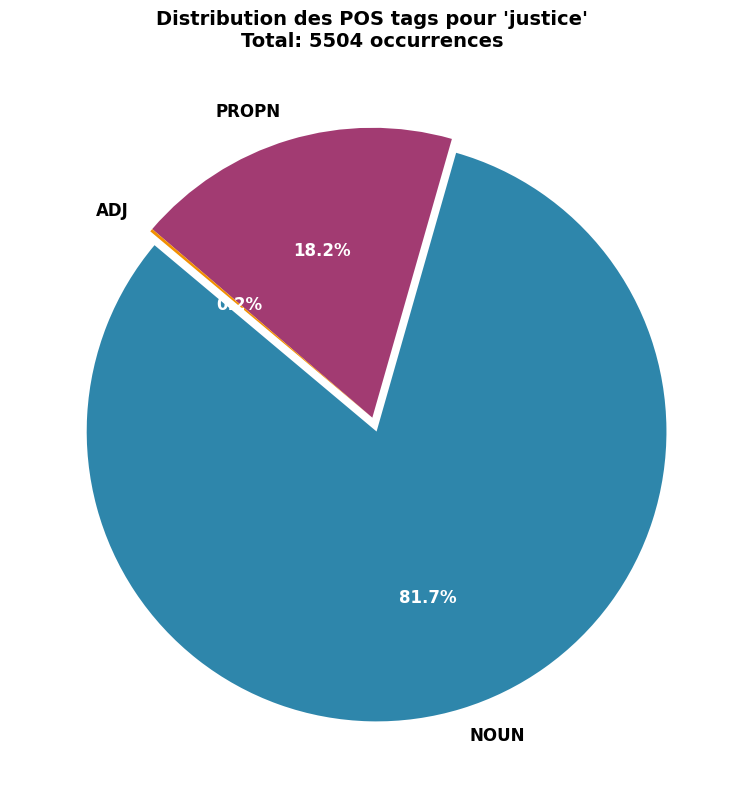


1. CONTEXTE :
   ...The e-Justice Strategy and Action Plan 2019-2023 identify as prior...
   Token: 'justice' | Head: 'strategy' | Dep: 'amod'

   PHRASE COMPLÈTE :
   The e-Justice Strategy and Action Plan 2019-2023 identify as priority areas the use of AI and blockchain/DLT in the justice field. (extracted from228.html)...
--------------------------------------------------------------------------------

2. CONTEXTE :
   ...ons’) to be implemented as part of the 2019-2023
European e-Justice Strategy. (extracted from65.pdf)...
   Token: 'justice' | Head: 'strategy' | Dep: 'compound'

   PHRASE COMPLÈTE :
   The Council of the European Union adopted in 2019 the 2019-2023 Action Plan on European e-Justice,
which sets out a list of projects and initiatives (‘actions’) to be implemented as part of the 2019-2...
--------------------------------------------------------------------------------

3. CONTEXTE :
   ...ons’) to be implemented as part of the 2019-2023
European e-Justice Strategy. 

In [ ]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

pos_tags = Counter()
adj_examples = []

for phrase in phrases_justice:
    doc = nlp(phrase.lower())
    for token in doc:
        if token.text == "justice" or token.lemma_ == "justice":
            pos = token.pos_
            pos_tags[pos] += 1
            
            if token.lemma_.lower() == "justice" and token.pos_ == "ADJ": # Pour comprendre pourquoi on obtient des Adj
                start = max(0, token.idx - 60)
                end = min(len(phrase), token.idx + 60)
                context = phrase[start:end].strip()
                adj_examples.append({
                    'phrase_complete': phrase,
                    'contexte': context,
                    'token_text': token.text,
                    'head': token.head.text,
                    'dep': token.dep_
                })

print("POS tags du terme 'justice' :")
print("=" * 50)
total = sum(pos_tags.values())
for pos, count in pos_tags.most_common():
    pct = (count / total) * 100
    print(f"{pos:15} : {count:4} occurrences ({pct:.1f}%)")


if pos_tags:
    tags, counts = zip(*pos_tags.most_common())

    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=tags,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0.05, 0, 0],
        textprops={'fontsize': 12, 'weight': 'bold'}
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
    
    plt.title(f"Distribution des POS tags pour 'justice'\nTotal: {total} occurrences", 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("Cas où justice est considéré comme un adj:\n\n")
    for i, ex in enumerate(adj_examples, 1):
        print(f"\n{i}. CONTEXTE :")
        print(f"   ...{ex['contexte']}...")
        print(f"   Token: '{ex['token_text']}' | Head: '{ex['head']}' | Dep: '{ex['dep']}'")
        print(f"\n   PHRASE COMPLÈTE :")
        print(f"   {ex['phrase_complete'][:200]}...")
        print("-" * 80)

<font color="orange">2.6 Answer:</font> 

## 2.6 Analyse syntaxique : catégories grammaticales (POS tagging)

Le graphique en camembert révèle que "justice" apparaît sous trois formes grammaticales, dont deux sont vraiment significatives :

**NOUN (Nom commun) - 82%** : C'est clairement l'usage dominant. Le terme "justice" fonctionne comme un nom commun dans des contextes variés : après des prépositions ("administration of justice", "access to justice"), dans des noms composés ("justice system", "justice reform"), ou en coordination avec d'autres concepts ("equality, justice and equity").

**PROPN (Nom propre) - 18%** : Cette proportion importante s'explique par la présence fréquente de noms d'institutions officielles comme "Court of Justice of the European Union", "Ministry of Justice", "Department of Justice", ou "International Court of Justice". Cela reflète bien la dimension institutionnelle du corpus, qui traite des organisations et structures juridiques.

**ADJ (Adjectif) - <1%** : Les 9 occurrences classées comme adjectifs correspondent uniquement à l'expression "e-Justice Strategy". Il s'agit d'erreurs d'annotation de spaCy, qui ne reconnaît pas correctement ce terme composé avec trait d'union. En réalité, "e-Justice" est un nom propre désignant la stratégie européenne de justice numérique. Si on corrige ces erreurs, la distribution devient : NOUN 81.8%, PROPN 18.4%, ADJ 0%. Cela montre l'importance de vérifier manuellement les résultats automatiques, surtout pour les néologismes et termes institutionnels.

**Ce que cela nous apprend** : Le terme "justice" a une double fonction dans le corpus. D'un côté, il sert de concept abstrait dans les discussions théoriques sur l'IA et le droit (82%). De l'autre, il identifie des institutions juridiques concrètes (18%). Le fait que l'usage conceptuel domine largement suggère que le corpus adopte une approche plus analytique et théorique que strictement administrative.

# <font color="green">**3 - AMR graphs exploration**</font>


We now investigate the semantics of sentences using Abstract Meaning Representation. Abstract Meaning Representation (AMR, <a href="https://aclanthology.org/W13-2322.pdf">Banarescu et al, 2013</a>)  provides a framework to model the meaning of a sentence, notably actions, events or states and their participants. AMR relies heavily on (verbal) concepts defined in <a href="https://propbank.github.io/">PropBank</a> . The figure below shows an AMR representation for the sentence "Barack Obama was born in 1961". In this figure, ```bear-02``` stands for PropBank's second sense for the verb ''to bear''. Instances are indicated by a following ```/```, for example  ```p``` is an instance of the concept  ```person ```. The names of the variables do not have any particular meaning, they have to be distinct. Relations are indicated by an initial colon (ex:  ```:ARG1```,  ```:time```). Literals (strings and numbers) lack a preceding instance and  ```/``` (ex:  ``` ``Obama'' ``` and  ```1961```. More info on AMR syntax can be found here: https://github.com/amrisi/amr-guidelines/blob/master/amr.md
.

<center>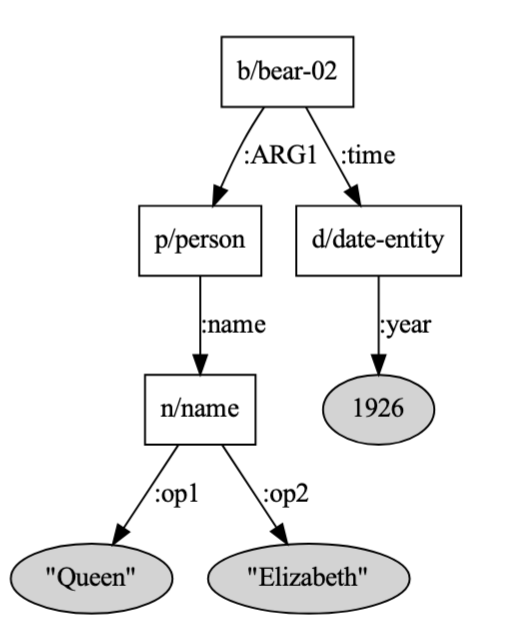</center>

The same graph can be represented in a serialised format called PENMAN format: 
```
(b / bear-02
    :ARG1 (p / person
        :name (n / name
            :op1 "Queen"
            :op2 "Elizabeth"))
    :time (d / date-entity
        :year 1926))
```

AMR graphs for justice-MapAIE are provided in the file `justice-MapAIE_penmans.amr`. It is text file containing, for each sentence:
- a line `::snt`, providing the original sentence in English;
- a line with the file number;
- the AMR graph in PENMAN format.

<font color="red">3.1 Question:</font> Explore the PropBank concepts used in the AMR graphs provided in `key_penmans.amr`. What concepts are used to represent the term _justice_? Which one of these concepts are actually part of PropBank (provide the link to the concept's frame for these)? Which ones are not part of PropBank? Where do these concept come from? 

In [ ]:
import re

# Lire votre fichier AMR
with open("key_penmans.amr", "r", encoding="utf-8") as f:
    amr_content = f.read()

# Extraire tous les concepts contenant "justice"
justice_concepts = re.findall(r'\([a-z0-9]+\s*/\s*[^\)]*justice[^\)]*\)', amr_content, re.IGNORECASE)

print("Concepts AMR contenant 'justice' :")
for concept in set(justice_concepts):
    print(f"  - {concept}")

# Chercher les frames PropBank
propbank_frames = re.findall(r'\([a-z0-9]+\s*/\s*[a-z]+-\d+', amr_content)
print("\nFrames PropBank dans le document :")
for frame in set(propbank_frames):
    print(f"  - {frame}")

<font color="orange">3.1 Answer:</font> 

AMR graphs give access to an abstraction of the semantic structure of the original sentences. Here, we are interested in the term _justice_, its semantic relations, and its semantic role in different contexts. In terms of AMR structure, we want to analyze the following elements:
- the position of the term _justice_ in the AMR graph (root/node/leaf);
- the parents (superior concepts) of the term _justice_;
- the siblings (concepts with the same parent) of the term _justice_;
- the children (inferior concepts) of the term _justice_;
- the relationships linking _justice_ to its parents and its children.

<font color="red">3.2 Question:</font> Explore the structure of the AMR graphs provided in `key_penmans.amr`. Please provide visualisations and comments for each of the explored elements.

In [ ]:
# To-do

<font color="orange">3.2 Answer:</font> 